In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook

from sklearn.datasets import make_classification, make_circles
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, \
    accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Markdown, display
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use("ggplot")
sns.set(rc={'figure.figsize':(15.7,8.27)})

import warnings
warnings.filterwarnings("ignore")

In [2]:
def load_data():
    header = ['edible', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
    data = pd.read_csv('agaricus-lepiota.data', header=None, names=header)
    value_map = {
        'edible': {'p': 'poisonous', 'e': 'edible'},
        'bruises?': {'t': 'bruises', 'f': 'no'},
        'cap-surface': {'y': 'scaly', 'g': 'grooves', 'f': 'fibrous', 's': 'smooth'},
        'stalk-color-below-ring': {'b': 'buff', 'o': 'orange', 'p': 'pink', 'g': 'gray', 'n': 'brown', 'e': 'red', 'w': 'white', 'y': 'yellow', 'c': 'cinnamon'},
        'gill-spacing': {'w': 'crowded', 'd': 'distant', 'c': 'close'},
        'veil-color': {'n': 'brown', 'y': 'yellow', 'w': 'white', 'o': 'orange'},
        'veil-type': {'u': 'universal', 'p': 'partial'},
        'cap-shape': {'f': 'flat', 'k': 'knobbed', 's': 'sunken', 'x': 'convex', 'c': 'conical', 'b': 'bell'},
        'odor': {'y': 'fishy', 'l': 'anise', 'm': 'musty', 'n': 'none', 'p': 'pungent', 'a': 'almond', 'c': 'creosote', 's': 'spicy', 'f': 'foul'},
        'ring-type': {'s': 'sheathing', 'z': 'zone', 'e': 'evanescent', 'n': 'none', 'f': 'flaring', 'p': 'pendant', 'c': 'cobwebby', 'l': 'large'},
        'stalk-root': {'u': 'cup', 'b': 'bulbous', 'z': 'rhizomorphs', 'c': 'club', '?': 'missing', 'r': 'rooted', 'e': 'equal'},
        'gill-color': {'w': 'white', 'k': 'black', 'b': 'buff', 'n': 'brown', 'p': 'pink', 'e': 'red', 'y': 'yellow', 'u': 'purple', 'h': 'chocolate', 'g': 'gray', 'o': 'orange', 'r': 'green'},
        'gill-size': {'n': 'narrow', 'b': 'broad'},
        'cap-color': {'b': 'buff', 'c': 'cinnamon', 'u': 'purple', 'e': 'red', 'p': 'pink', 'r': 'green', 'w': 'white', 'y': 'yellow', 'g': 'gray', 'n': 'brown'},
        'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
        'stalk-surface-above-ring': {'f': 'fibrous', 's': 'smooth', 'k': 'silky', 'y': 'scaly'},
        'gill-attachment': {'n': 'notched', 'f': 'free', 'd': 'descending', 'a': 'attached'},
        'ring-number': {'o': 'one', 'n': 'none', 't': 'two'},
        'spore-print-color': {'r': 'green', 'n': 'brown', 'y': 'yellow', 'k': 'black', 'b': 'buff', 'h': 'chocolate', 'o': 'orange', 'u': 'purple', 'w': 'white'},
        'habitat': {'w': 'waste', 'p': 'paths', 'u': 'urban', 'l': 'leaves', 'd': 'woods', 'g': 'grasses', 'm': 'meadows'},
        'stalk-color-above-ring': {'b': 'buff', 'c': 'cinnamon', 'w': 'white', 'e': 'red', 'p': 'pink', 'y': 'yellow', 'g': 'gray', 'o': 'orange', 'n': 'brown'},
        'population': {'a': 'abundant', 'y': 'solitary', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'c': 'clustered'},
        'stalk-surface-below-ring': {'k': 'silky', 'y': 'scaly', 's': 'smooth', 'f': 'fibrous'}
    }
    return data.replace(value_map)


In [3]:
data = load_data()
target = 'edible'
data

,edible,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


# EDA

In [4]:
red_color = sorted(sns.color_palette(), key=lambda x: x[0] - x[1] - x[2], reverse=True)[0]
green_color = sorted(sns.color_palette(), key=lambda x: x[2] - x[0] - x[1], reverse=True)[0]

def feature_eda(column):
    fig, ax =plt.subplots(1,2)
    palette = {'edible': green_color, 'poisonous': red_color}
    sns.countplot(x=column, data=data, ax=ax[0])
    sns.countplot(x=column, data=data, hue=target, palette=palette, ax=ax[1])
    fig.show()
    display(Markdown('## {}'.format(column)))
    value_counts = data.groupby(target)[column].value_counts()
    table = value_counts.unstack(level=0)
    table = table.fillna(0)
    table['total'] = table['edible'] + table['poisonous']
    table.index.name = None
    table.columns.name = None
    table.sort_values(by=['total'], ascending=False, inplace=True)
    display(table)
    plt.show()


## edible

,edible,poisonous,total
edible,4208.0,0.0,4208.0
poisonous,0.0,3916.0,3916.0


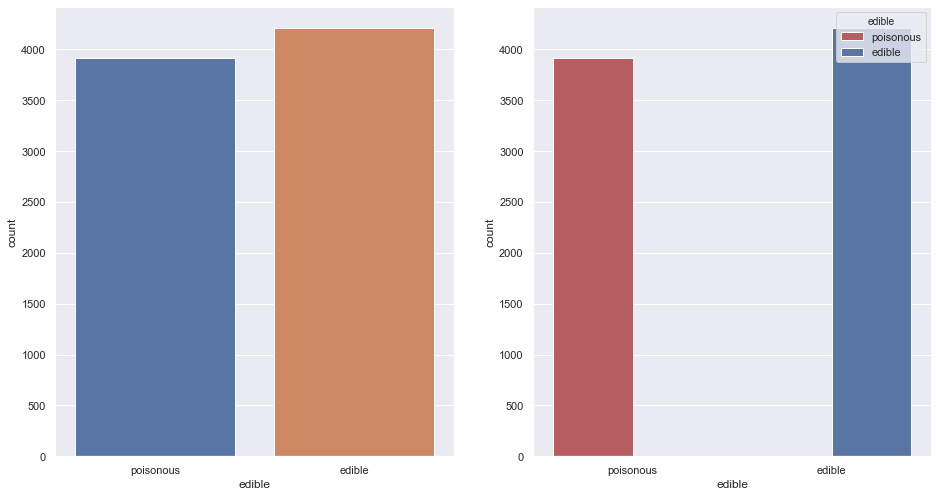

## cap-shape

,edible,poisonous,total
convex,1948.0,1708.0,3656.0
flat,1596.0,1556.0,3152.0
knobbed,228.0,600.0,828.0
bell,404.0,48.0,452.0
sunken,32.0,0.0,32.0
conical,0.0,4.0,4.0


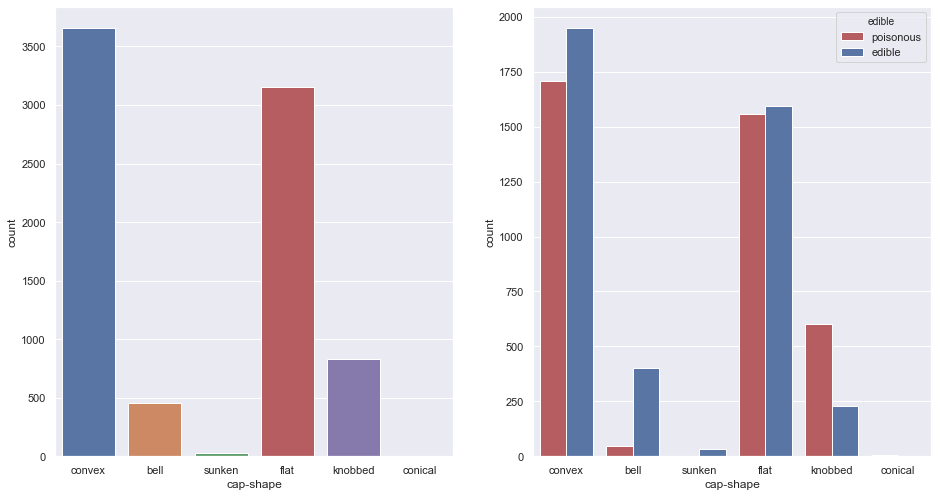

## cap-surface

,edible,poisonous,total
scaly,1504.0,1740.0,3244.0
smooth,1144.0,1412.0,2556.0
fibrous,1560.0,760.0,2320.0
grooves,0.0,4.0,4.0


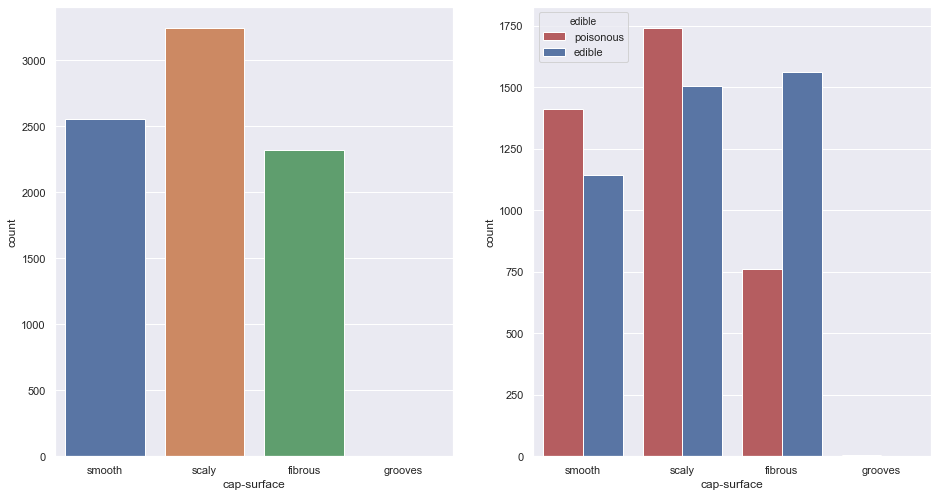

## cap-color

,edible,poisonous,total
brown,1264.0,1020.0,2284.0
gray,1032.0,808.0,1840.0
red,624.0,876.0,1500.0
yellow,400.0,672.0,1072.0
white,720.0,320.0,1040.0
buff,48.0,120.0,168.0
pink,56.0,88.0,144.0
cinnamon,32.0,12.0,44.0
green,16.0,0.0,16.0
purple,16.0,0.0,16.0


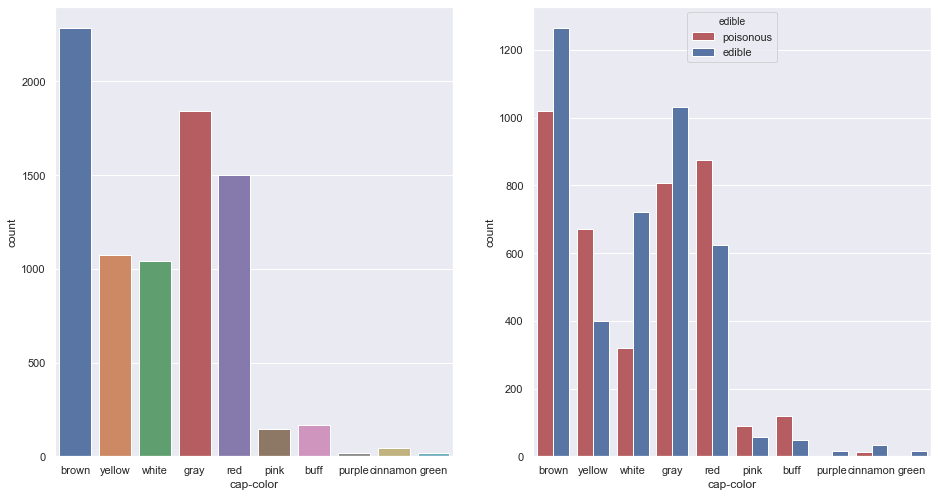

## bruises?

,edible,poisonous,total
no,1456,3292,4748
bruises,2752,624,3376


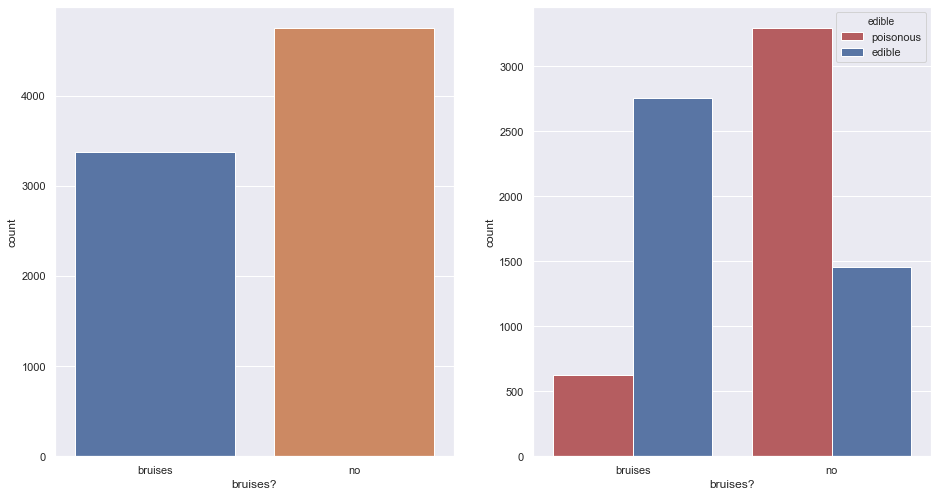

## odor

,edible,poisonous,total
none,3408.0,120.0,3528.0
foul,0.0,2160.0,2160.0
fishy,0.0,576.0,576.0
spicy,0.0,576.0,576.0
almond,400.0,0.0,400.0
anise,400.0,0.0,400.0
pungent,0.0,256.0,256.0
creosote,0.0,192.0,192.0
musty,0.0,36.0,36.0


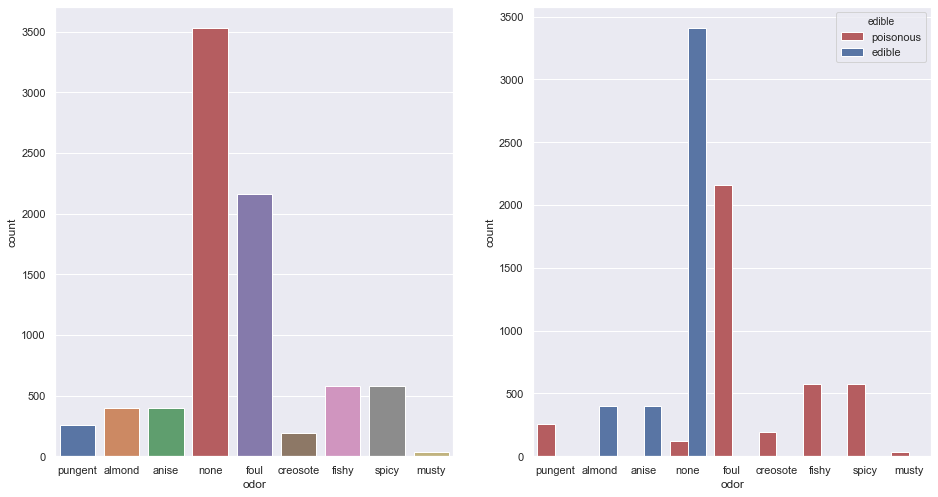

## gill-attachment

,edible,poisonous,total
free,4016,3898,7914
attached,192,18,210


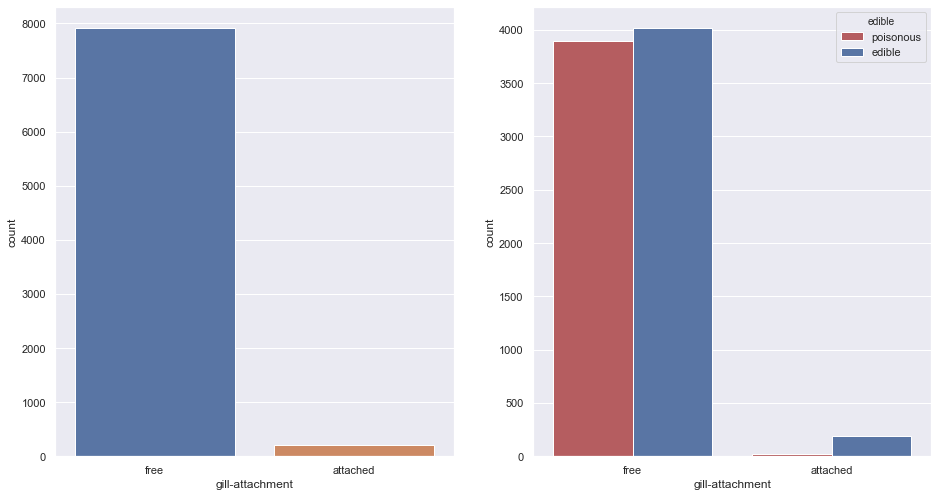

## gill-spacing

,edible,poisonous,total
close,3008,3804,6812
crowded,1200,112,1312


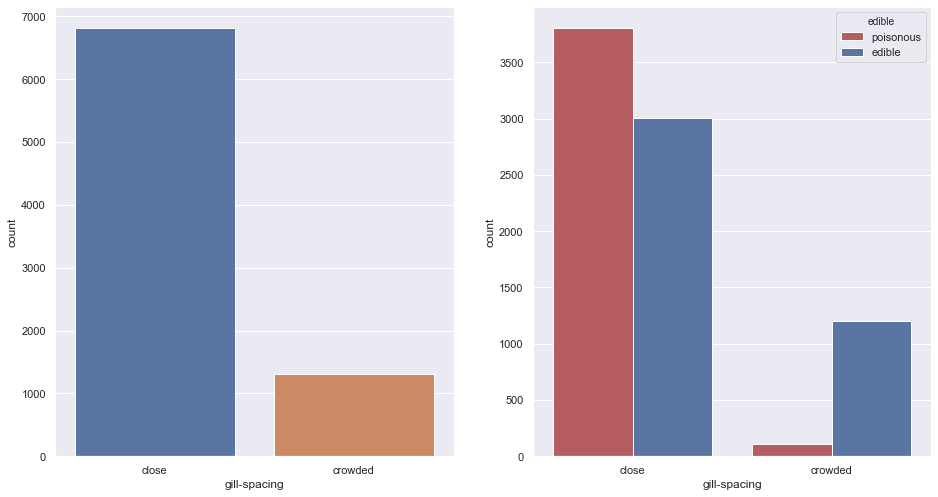

## gill-size

,edible,poisonous,total
broad,3920,1692,5612
narrow,288,2224,2512


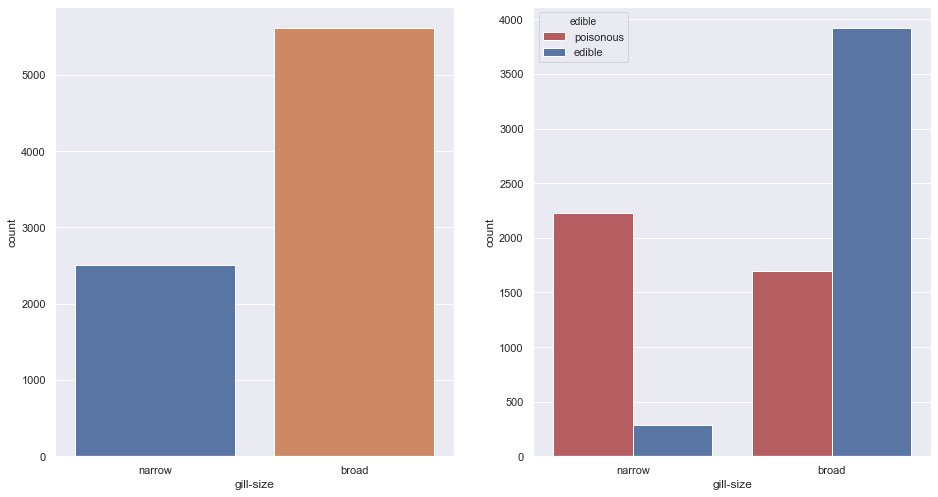

## gill-color

,edible,poisonous,total
buff,0.0,1728.0,1728.0
pink,852.0,640.0,1492.0
white,956.0,246.0,1202.0
brown,936.0,112.0,1048.0
gray,248.0,504.0,752.0
chocolate,204.0,528.0,732.0
purple,444.0,48.0,492.0
black,344.0,64.0,408.0
red,96.0,0.0,96.0
yellow,64.0,22.0,86.0


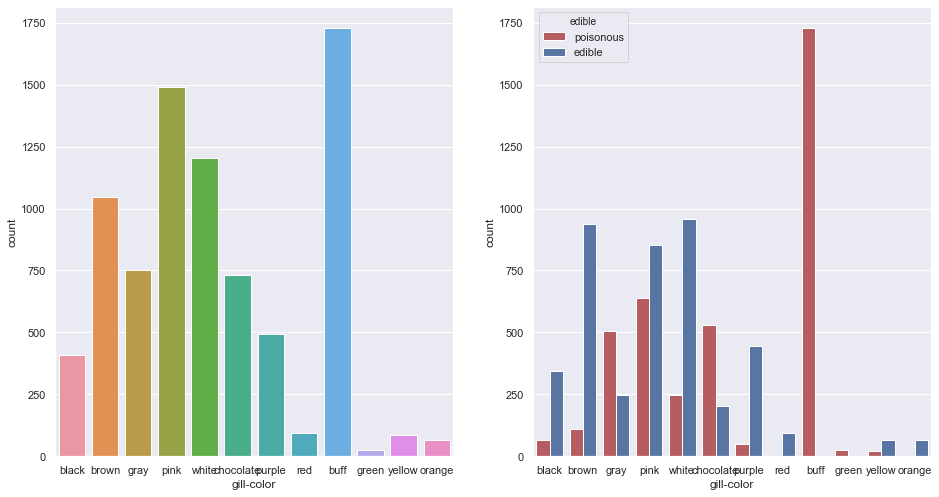

## stalk-shape

,edible,poisonous,total
tapering,2592,2016,4608
enlarging,1616,1900,3516


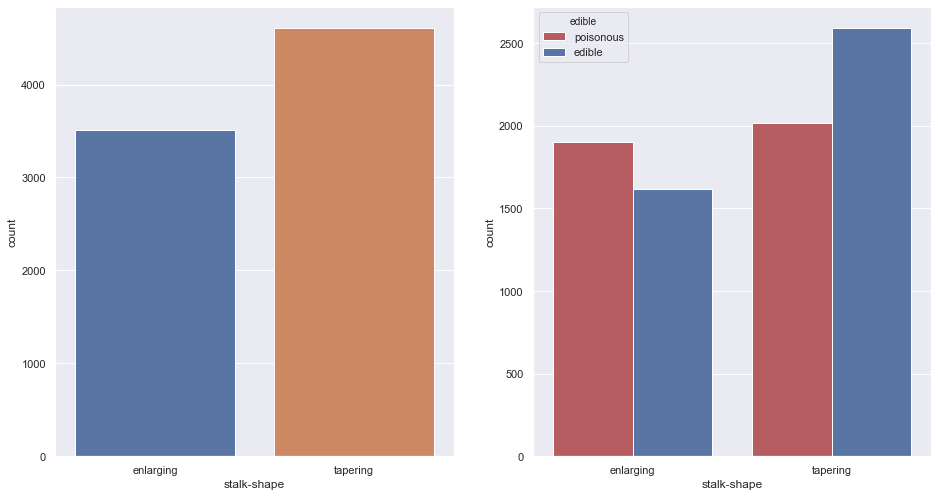

## stalk-root

,edible,poisonous,total
bulbous,1920.0,1856.0,3776.0
missing,720.0,1760.0,2480.0
equal,864.0,256.0,1120.0
club,512.0,44.0,556.0
rooted,192.0,0.0,192.0


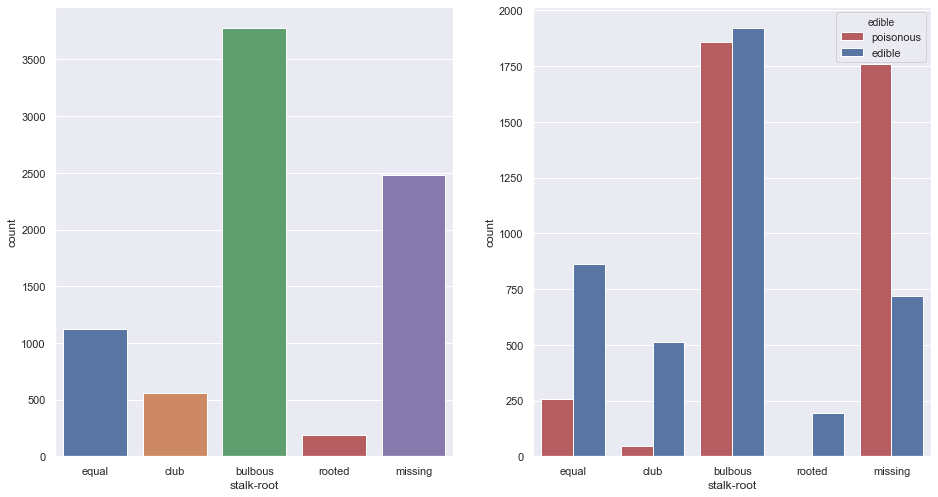

## stalk-surface-above-ring

,edible,poisonous,total
smooth,3640,1536,5176
silky,144,2228,2372
fibrous,408,144,552
scaly,16,8,24


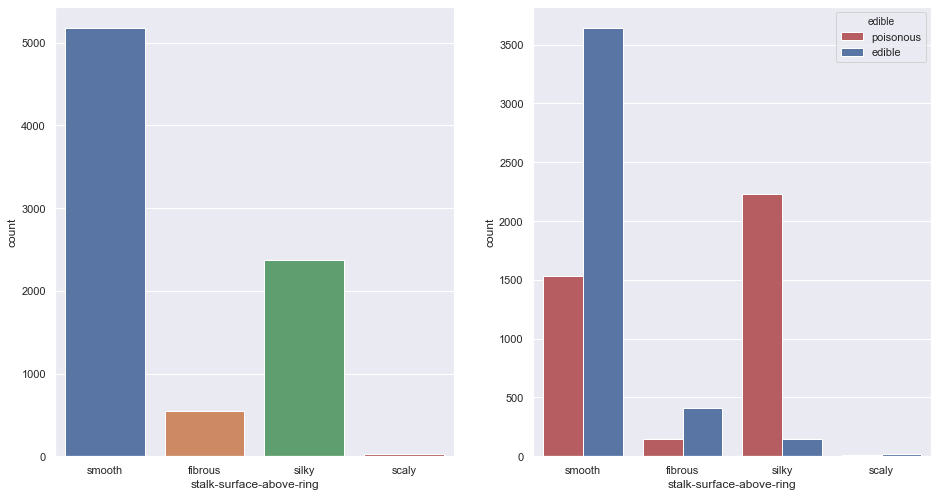

## stalk-surface-below-ring

,edible,poisonous,total
smooth,3400,1536,4936
silky,144,2160,2304
fibrous,456,144,600
scaly,208,76,284


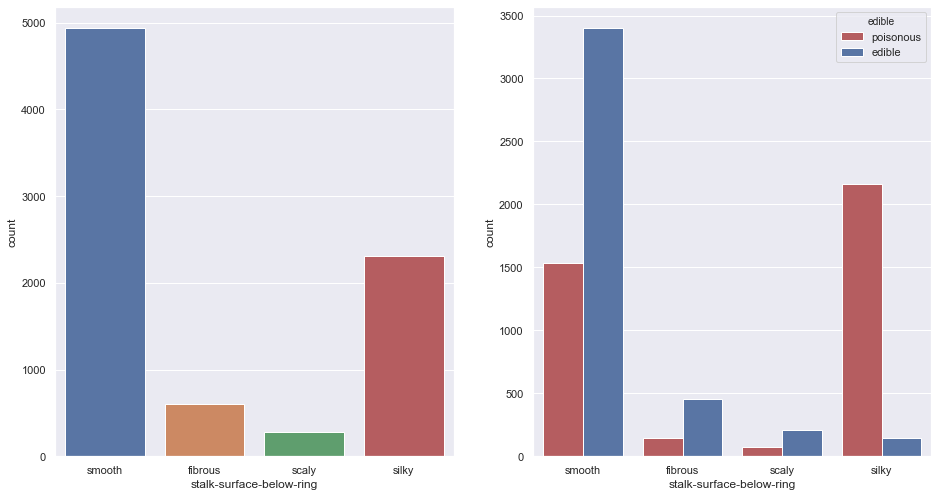

## stalk-color-above-ring

,edible,poisonous,total
white,2752.0,1712.0,4464.0
pink,576.0,1296.0,1872.0
gray,576.0,0.0,576.0
brown,16.0,432.0,448.0
buff,0.0,432.0,432.0
orange,192.0,0.0,192.0
red,96.0,0.0,96.0
cinnamon,0.0,36.0,36.0
yellow,0.0,8.0,8.0


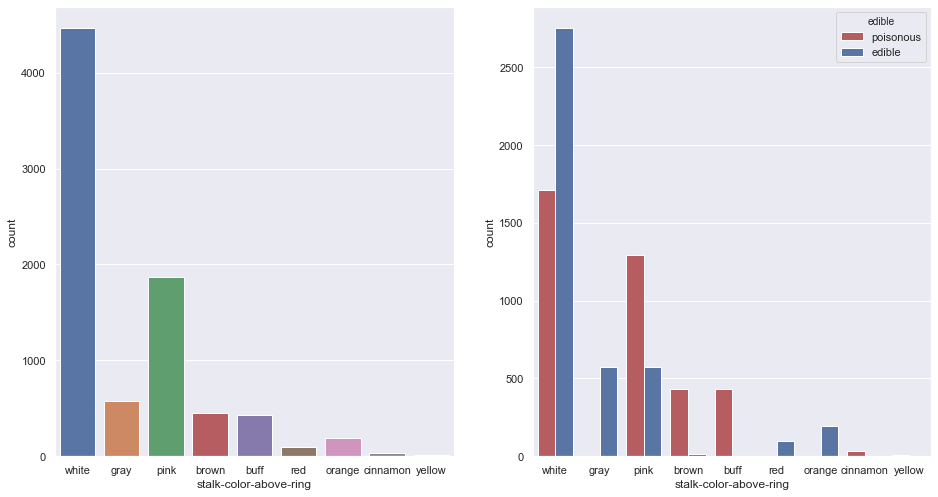

## stalk-color-below-ring

,edible,poisonous,total
white,2704.0,1680.0,4384.0
pink,576.0,1296.0,1872.0
gray,576.0,0.0,576.0
brown,64.0,448.0,512.0
buff,0.0,432.0,432.0
orange,192.0,0.0,192.0
red,96.0,0.0,96.0
cinnamon,0.0,36.0,36.0
yellow,0.0,24.0,24.0


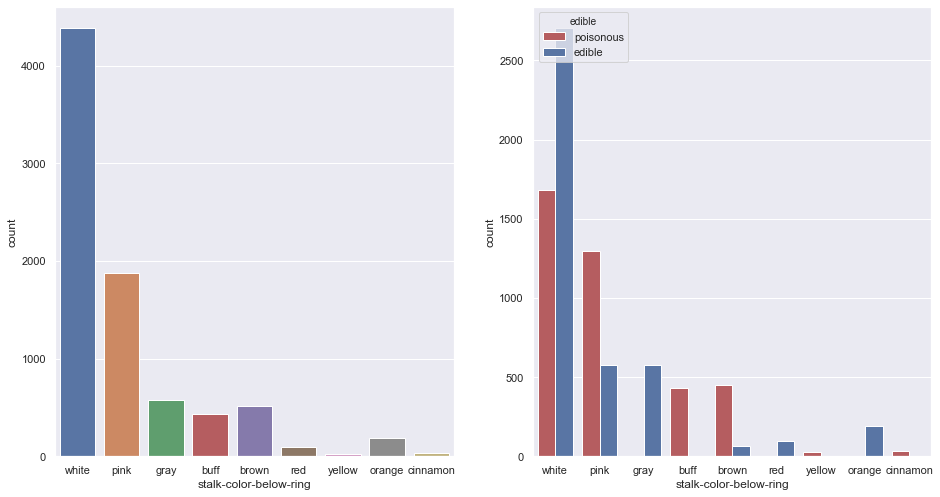

## veil-type

,edible,poisonous,total
partial,4208,3916,8124


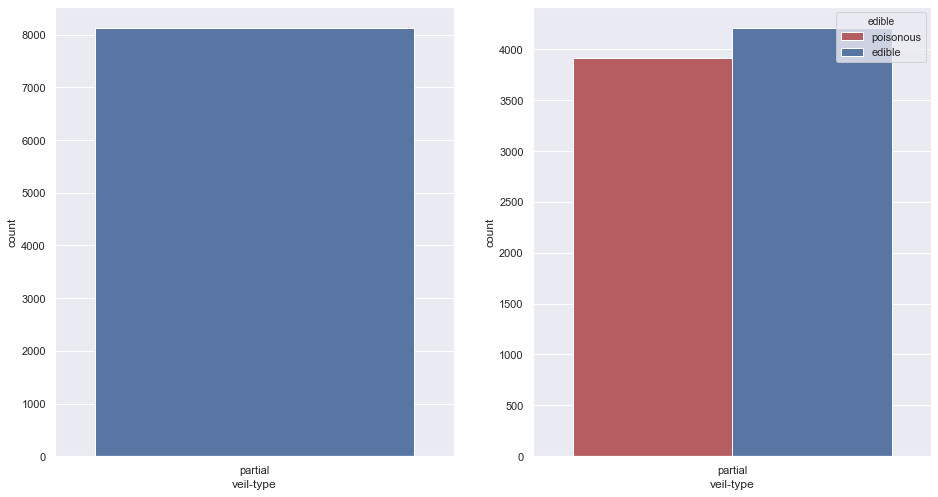

## veil-color

,edible,poisonous,total
white,4016.0,3908.0,7924.0
brown,96.0,0.0,96.0
orange,96.0,0.0,96.0
yellow,0.0,8.0,8.0


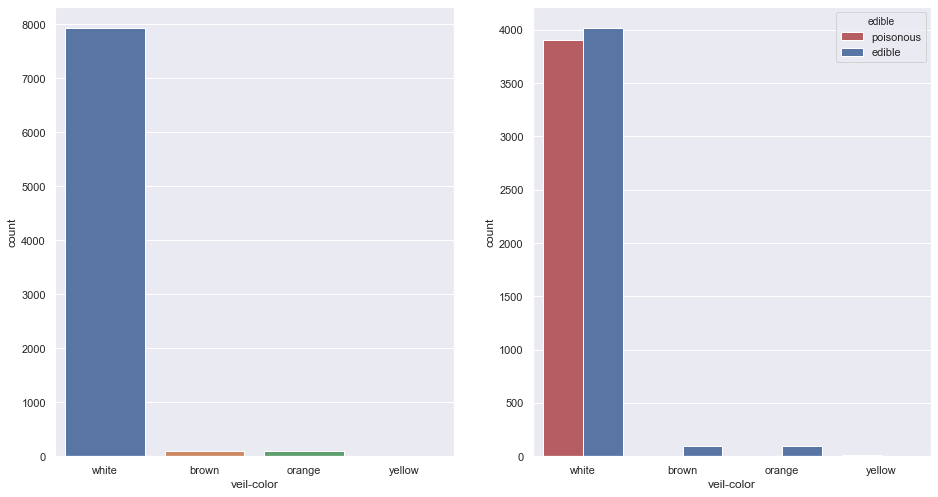

## ring-number

,edible,poisonous,total
one,3680.0,3808.0,7488.0
two,528.0,72.0,600.0
none,0.0,36.0,36.0


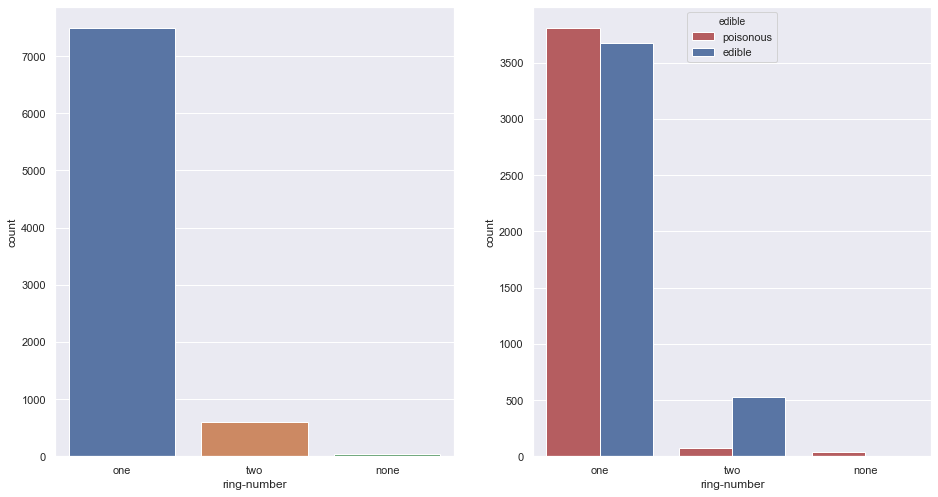

## ring-type

,edible,poisonous,total
pendant,3152.0,816.0,3968.0
evanescent,1008.0,1768.0,2776.0
large,0.0,1296.0,1296.0
flaring,48.0,0.0,48.0
none,0.0,36.0,36.0


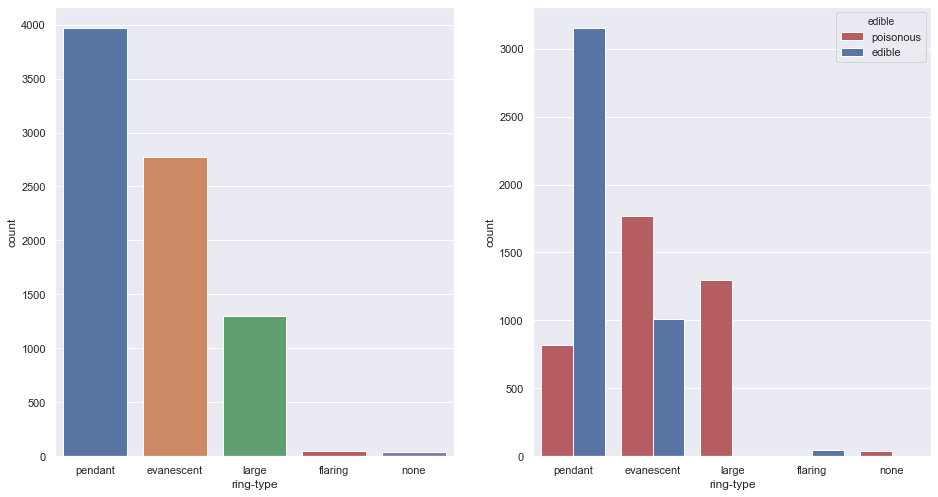

## spore-print-color

,edible,poisonous,total
white,576.0,1812.0,2388.0
brown,1744.0,224.0,1968.0
black,1648.0,224.0,1872.0
chocolate,48.0,1584.0,1632.0
green,0.0,72.0,72.0
buff,48.0,0.0,48.0
orange,48.0,0.0,48.0
purple,48.0,0.0,48.0
yellow,48.0,0.0,48.0


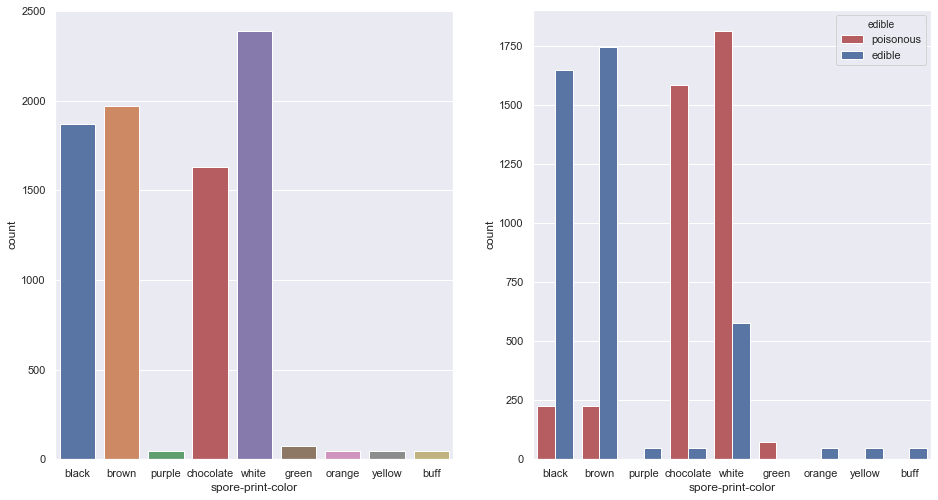

## population

,edible,poisonous,total
several,1192.0,2848.0,4040.0
solitary,1064.0,648.0,1712.0
scattered,880.0,368.0,1248.0
numerous,400.0,0.0,400.0
abundant,384.0,0.0,384.0
clustered,288.0,52.0,340.0


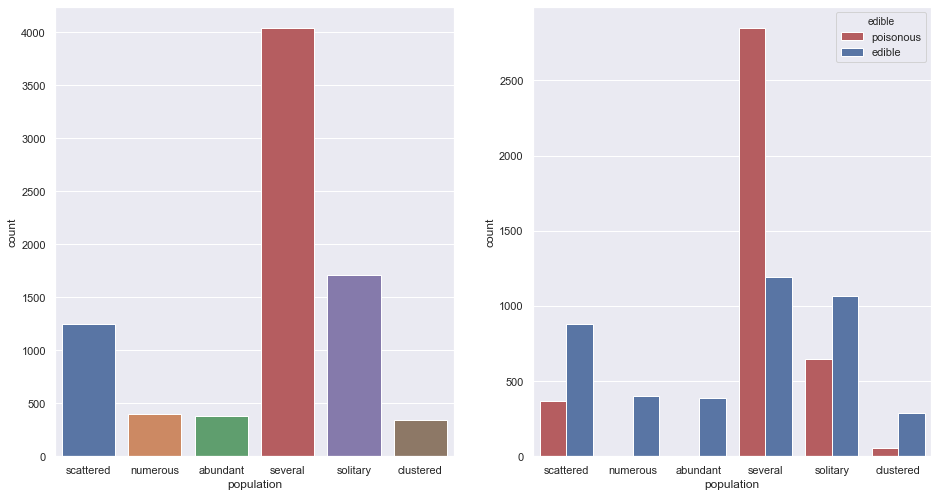

## habitat

,edible,poisonous,total
woods,1880.0,1268.0,3148.0
grasses,1408.0,740.0,2148.0
paths,136.0,1008.0,1144.0
leaves,240.0,592.0,832.0
urban,96.0,272.0,368.0
meadows,256.0,36.0,292.0
waste,192.0,0.0,192.0


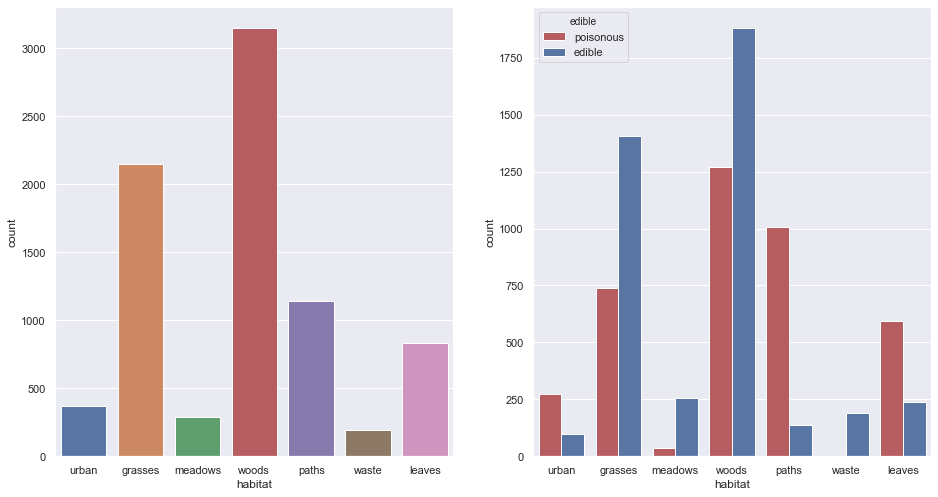

In [5]:
for column in data.columns:
    feature_eda(column)

In [6]:
def data_split_train_test(data, target, test_size=0.3):
    print(data[target])
    X_train, X_test, y_train, y_test = train_test_split(
        data.drop(labels=[target], axis=1),
        data[target],
        test_size=test_size,
        stratify=data[target],
        random_state=0)
    return X_train, X_test, y_train, y_test

def quality_report(prediction, actual):
    report_str = "Accuracy: \t {:.3f}\n" +\
                 "Precision: \t {:.3f}\n" +\
                 "Recall: \t {:.3f}\n" +\
                 "f1_score: \t {:.3f}\n" +\
                 "ROC-AUC: \t {:.3f}"
    
    acc = accuracy_score(prediction, actual)
    precision = precision_score(prediction, actual)
    recall = recall_score(prediction, actual)
    f1 = f1_score(prediction, actual)
    print(prediction)
    rocauc = roc_auc_score(prediction, actual)
    quality_list = [acc, precision, recall, f1, rocauc]
    
    return quality_list

quality = pd.DataFrame(
    [],
    columns=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"],
)

def quality_report_of(data, target, pipeline):
    X_train, X_test, y_train, y_test = data_split_train_test(data, target)
    pipeline.fit(X_train, y_train)
    pred = pipeline.predict(X_test)
    return quality_report(pred, y_test)

def make_examine(data, target, pos_label):
    targeted_data = data.copy()
    targeted_data[target] = data[target].apply(lambda value: 1 if value == pos_label else 0)
    def examine(tag, pipeline):
        quality.loc[tag, :] = quality_report_of(targeted_data, target, pipeline)
    return examine

examine = make_examine(data, target, 'edible')

# Baseline

В качестве baseline буду использовать логистическую регрессию.

In [7]:
examine('baseline (naive logistic regression)', make_pipeline(
    OneHotEncoder(),
    LogisticRegression()
))


0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: edible, Length: 8124, dtype: int64
[0 0 1 ... 1 1 1]


In [8]:
quality

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline (naive logistic regression),1,1,1,1,1


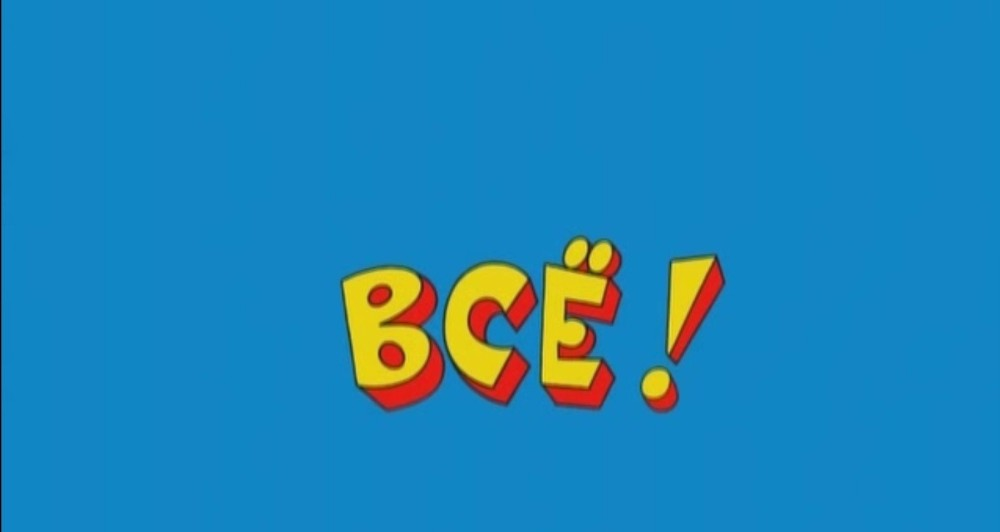